<a href="https://colab.research.google.com/github/moelbir02/CodeLouisvilleProject/blob/master/DATA460_Assign2_alt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h1><b><i>Sentiment Analysis on Restaurant Reviews</i></b></h1>

TEXT 1: Provide a 1-2 paragraph **high level** overview of the purpose (what is going on AND why) of this Notebook, including the various steps as indicated by the following titles (some additional detail can be provided by subtitles within the notebook, but this description should remain 'high level'):
*   Exploratory Data Analysis
*   Model Training
*   Predictions
*   Overall Accuracy

NOTE: You may find this TEXT 1 easier to write AT THE END, after having completely run the Notebook and completed the rest of the assignment.

#  Importing the libraries

# Library Loading

In [1]:
# Importing essential Libraries

# NumPy is used for numerical computations and working with arrays.
import numpy as np

# Pandas is used for data manipulation and analysis.
import pandas as pd


# Exploratory Data Analysis (EDA)

<h2><b>Data Loading</b></h2>  Be sure you have uploaded the Restaurant_Reviews.csv data file to the Files area of Colab.

In [2]:
df = pd.read_csv(r'Restaurant_Reviews.csv')

<h2><b>Descriptive Data Analysis</b></h2>

In [3]:
df.shape

(1000, 2)

In [4]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
df.sample(5)

,Review,Liked
133,The management is rude.,0
170,"We also ordered the spinach and avocado salad,...",0
411,"Come hungry, leave happy and stuffed!",1
747,I always order from the vegetarian menu during...,1
168,I've never been treated so bad.,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
df['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [10]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [11]:
df.isnull().sum()

,0
Review,0
Liked,0


In [12]:
df.duplicated().sum()

np.int64(6)

In [13]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,specs=[[{'type':'xy'}, {'type':'domain'}]])

fig.add_trace(
    go.Bar(
        x=df['Liked'].value_counts().index,
        y= df['Liked'].value_counts().values,
         marker=dict(color=['#6B816C','#91B092']), showlegend=False,
           text=df['Liked'].value_counts().values, textposition='auto', textfont=dict(size=18)
        ),
    row=1,col=1
    )

fig.add_trace(
    go.Pie(
        labels=df['Liked'].value_counts().index,
        values=df['Liked'].value_counts().values,
         marker=dict(colors=['#6B816C','#91B092']), textfont=dict(size=18),
         pull=[0.01,0.01]
        ),
    row=1,col=2
    )





fig.update_layout(title='<b>Distribution of the target<b>',
                 title_font={'size':25},
                 paper_bgcolor='#E0E1CD',
                 plot_bgcolor='#E0E1CD',
                 showlegend=True)

fig.update_yaxes(showgrid=False)
fig.show()

TEXT 2: In 2-3 sentences, based on the results of the Descriptive Data Analysis, provide a description of the dataset, filling in context that you can gather from the data itself, since you have not been given a data dictionary or description of the dataset.  Include 'technical' aspects of the dataset: how many rows, columns, datatypes, etc.  What does the 'Distribution of the target' visualization tell you about the 'balance' of the data?

# **Feature Engineering**


In [14]:
df['Length'] = df['Review'].apply(len)
df.head(5)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


TEXT 3: What has been accomplished in the previous cell and why?

# **Data Preprocessing**


<h2><b>Importing essential NLP libraries</b></h2>

In [15]:
# Comment 1: <What are stopwords and why are they used in NLP?>
import nltk
import re

# Download NLTK stopwords data
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
print(list(stopwords.words('english')))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [17]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
'not' in stop_words

False

TEXT 3: In the previous cell, we searched for the word 'not' in stopwords and removed it, if it was in the list.  The final line of code, *'not' in stop_words*, returns as 'False', which is a confirmation that 'not' isn’t (or is no longer) in the list.    

Consider your response to Comment 1, what are stopwords and why are they used in NLP?  

**Why might it be important to remove 'not' from the stopwords list?  HINT: have a look at the code and output in the next cell.**

In [18]:
print('Original :',df.Review.iloc[1])
print('processed with not removing negation :',' '.join([word for word in df.Review.iloc[1].split() if word not in stop_words]))

Original : Crust is not good.
processed with not removing negation : Crust not good.


In [19]:
# Cleaning the Reviews and Creating a Corpus
# This cell is the perfect example of how several important ML tasks can be included in a single cell and run in 1.7 seconds with a single click.
# It's important to know what our code does in each cell, each line.

# Comment 2: <What is the purpose of 'cleaning the reviews'?>
# Comment 3: <What does the line corpus = [] do, what is its purpose?>

corpus = []

# Loop through the first 1000 reviews (adjust the range as needed) in the DataFrame 'df'.
for i in range(0, 1000):

    # Comment 4: Step 1: <What does the following line do (what AND why)?>
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])

    # Comment 5: Step 2: <What does the following line do (what AND why)?>
    review = review.lower()

    # Comment 6: Step 3: Tokenization, <What does the following line do (what AND why)?>
    review_words = review.split()

    # Comment 7: Step 4: Removing Stop Words, <What does the following line do (what AND why)?>
    review_words = [word for word in review_words if word not in stop_words]

    # Comment 8: Step 5: Stemming, <What does the following line do (what AND why)?>
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    # Comment 9: Step 6: Rejoining Tokens, <What does the following line do (what AND why)?>
    review = ' '.join(review)

    # Comment 10: Step 7: Append to Corpus, <What does the following line do (what AND why)?>
    corpus.append(review)

# Comment 11: After running this code, 'corpus' will contain <finish this phrase, what is the end result to the dataset, of the previous 7 steps>


In [20]:
corpus[:20]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like']

# Word Cloud

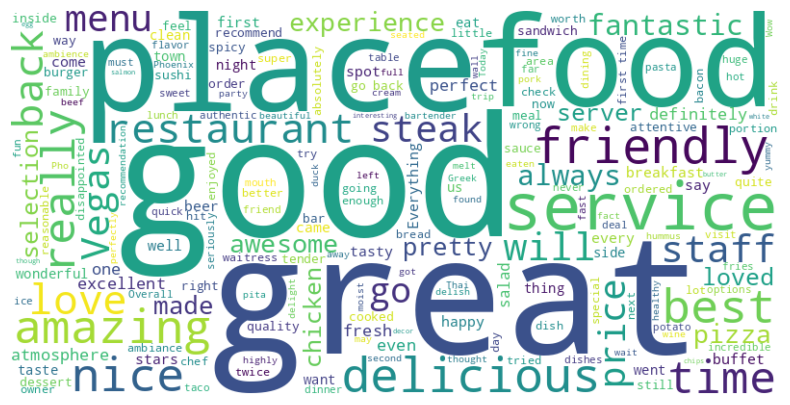

In [21]:
# import library
# positive review

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Code Modification 1: Copy and paste the code from the previous cell.
#Change two parameters to change the Word Cloud to depict negative reviews with a background in some color of your choice, other than white.
#Include the Code and a snip or cut and paste of your output in the Assignment Responses document.
#Modify comments to reflect the new image



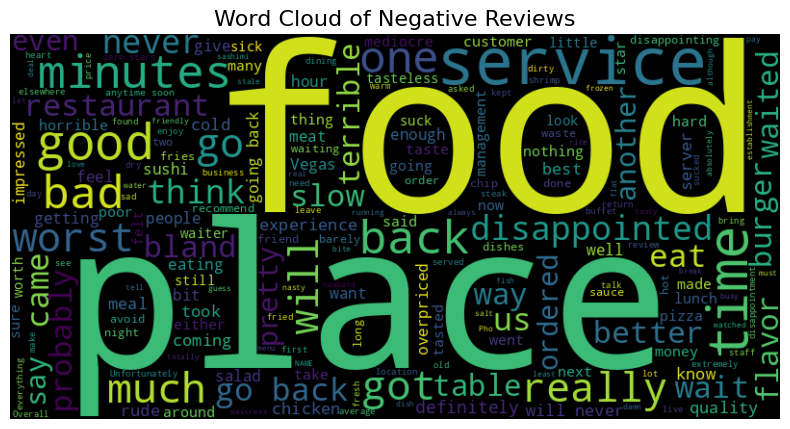

In [43]:
# Now that the dataset has been uploaded, let's regenerate the Word Cloud for negative reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd



# Filter for negative reviews
negative_reviews = df[df['Liked'] == 0]

# Join all text from the negative reviews
text_negative = ' '.join(negative_reviews['Review'].astype(str))

# Generate the WordCloud with a non-white background
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(text_negative)

# Plot and save the image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews", fontsize=16)

plt.show()


In [22]:
# Creating a Bag of Words Model
# For more detail on Bag of Words: https://builtin.com/machine-learning/bag-of-words

# Import the CountVectorizer class from scikit-learn, which is used to convert text data into numerical features.
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer with a specified maximum number of features (max_features).
# The 'max_features' parameter controls the number of most frequent words to keep in the vocabulary.
# Adjust this value based on your specific requirements.
cv = CountVectorizer(max_features=1500)

# Apply the CountVectorizer to the 'corpus' to transform the text data into a numerical representation.
# The 'fit_transform' method converts the text into a sparse matrix where rows represent reviews and columns represent words.
X = cv.fit_transform(corpus).toarray()

# 'X' now contains the BoW representation of the text data.

# Extract the target variable 'y' from the DataFrame 'df'.
# Assuming the target variable is located in the second column (index 1) of the DataFrame.
y = df.iloc[:, 1].values

# 'y' now contains the labels or target values corresponding to each review.

# The resulting 'X' and 'y' can be used to train machine learning models for tasks such as sentiment analysis or text classification.


<h2><b>Data Splitting</b></h2>

In [23]:
# Splitting the Dataset into Training and Testing Sets

# Comment 12: In this code, we split the dataset into training and testing sets to <finish this sentence, what is the purpose of splitting the dataset into two sets?>

# Import the 'train_test_split' function from scikit-learn, which is used for splitting datasets.

########################################################################################

from sklearn.model_selection import train_test_split

# Split the feature matrix 'X' and the target variable 'y' into training and testing sets.
# The 'test_size' parameter specifies the proportion of the dataset to include in the test split.
# Here, 20% of the data is reserved for testing (test_size=0.20).
# The 'random_state' parameter ensures reproducibility by fixing the random seed for the split.
# This means that the same split will be obtained every time you run the code with the same random_state value.

############################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


###########################################################################

# 'X_train' and 'y_train' contain the features and labels for the training set, respectively.
# 'X_test' and 'y_test' contain the features and labels for the testing set, respectively.

# The dataset is typically divided into a training set (used to train the model) and a testing set (used to evaluate the model's performance).
# The proportions used in this split can be adjusted based on the specific requirements of your analysis.

# In this example, the dataset contains 1000 samples, and 80% (800 samples) are used for training,
# while 20% (200 samples) are used for testing. These proportions can be modified as needed.


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# **Model Training**

TEXT 4: This notebook runs several algorithms on the dataset.  In layman's terms, explain the difference between machine learning for classification vs machine learning for prediction.  Can both approaches be applied to this problem?  Or is this problem more suited to one approach?

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
)
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import (
    LogisticRegression, SGDClassifier, RidgeClassifier,
)
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np

# Define a dictionary of models with their names as keys and model instances as values
models = {
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'NuSVC': NuSVC(),
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),

}

# Create an empty dictionary to store model accuracies
# ... Your code up to the loop ...

# Create an empty dictionary to store model accuracies and their differences
model_accuracies = {}
model_accuracies_diff = {}

# Specify the number of folds (k)
num_folds = 11

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through each model and train/evaluate it with k-fold cross-validation
for model_name, model in models.items():
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Calculate the average training and testing accuracy across all folds
    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)

    # Calculate the difference between training and testing accuracy
    accuracy_diff = abs(average_train_accuracy - average_test_accuracy)

    # Print training and testing accuracy for the model
    print(f"{model_name}: Training Accuracy={average_train_accuracy * 100:.2f}%, Testing Accuracy={average_test_accuracy * 100:.2f}%, Accuracy Difference={accuracy_diff * 100:.2f}%")
    print("="*149)

    # Store the average testing accuracy and the difference in accuracies in the model_accuracies and model_accuracies_diff dictionaries
    model_accuracies[model_name] = average_test_accuracy
    model_accuracies_diff[model_name] = accuracy_diff

# Sort the models based on the absolute difference between training and testing accuracy
sorted_models = sorted(model_accuracies_diff.items(), key=lambda x: x[1])
print()
# Print the best models in ascending order of accuracy difference
print("︻"*149)
print()
print("Best Models (Closest Training and Testing Accuracy):")
print()
print("︻"*149)
print()
for model_name, accuracy_diff in sorted_models:
    print(f"{model_name}: Accuracy Difference={accuracy_diff * 100:.2f}%")
    print("-"*100)

# Print the model with the smallest accuracy difference (best model)
best_model_name = sorted_models[0][0]
print(f"The Best Model is: {best_model_name}")

MultinomialNB: Training Accuracy=93.95%, Testing Accuracy=79.50%, Accuracy Difference=14.45%
RandomForestClassifier: Training Accuracy=99.53%, Testing Accuracy=80.20%, Accuracy Difference=19.33%
GradientBoostingClassifier: Training Accuracy=86.03%, Testing Accuracy=78.10%, Accuracy Difference=7.93%
AdaBoostClassifier: Training Accuracy=68.86%, Testing Accuracy=67.70%, Accuracy Difference=1.16%
BaggingClassifier: Training Accuracy=96.65%, Testing Accuracy=75.90%, Accuracy Difference=20.75%
ExtraTreesClassifier: Training Accuracy=99.53%, Testing Accuracy=79.70%, Accuracy Difference=19.83%
SVC: Training Accuracy=97.34%, Testing Accuracy=81.10%, Accuracy Difference=16.24%
LinearSVC: Training Accuracy=99.12%, Testing Accuracy=80.20%, Accuracy Difference=18.92%
NuSVC: Training Accuracy=98.74%, Testing Accuracy=81.20%, Accuracy Difference=17.54%
LogisticRegression: Training Accuracy=96.50%, Testing Accuracy=80.20%, Accuracy Difference=16.30%
SGDClassifier: Training Accuracy=99.01%, Testing Ac

TEXT 5: Your non-data scientist boss (or client) asks you "What's the difference between training accuracy and testing accuracy and what's the significance of the 'Accuracy Difference'?  Why don't we just choose the highest training accuracy?" Please respond to the two/three questions in layman's terms, but be aware that you must provide some background otherwise the specific answers to the questions may not suffice.  Begin by explaining the machine learning notion of training data vs testing data. Additional hint: at some point you should mention (and define) 'overfitting', how it is caused, how these metrics might help identify it and why overfitting should be avoided.


In [25]:
# Predicting the Test set results

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k)
num_folds = 11

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate precision, recall, and F1-score for the fold
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calculate and store the confusion matrix for the fold
    confusion = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(confusion)

    # Generate and store the classification report for the fold
    classification = classification_report(y_test, y_test_pred)
    classification_reports.append(classification)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
# Calculate the average accuracy difference using average accuracies
average_accuracy_difference = np.mean(np.array(train_accuracies) - np.array(test_accuracies)) # Changed line to calculate the difference of training and testing accuracies for each fold and then compute the average
# Calculate the average precision, recall, and F1-score
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

# Print the results
print("AdaBoostClassifier Results:")
print("-"*150)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("-"*150)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("-"*150)
print(f"Average Accuracies Difference: {average_accuracy_difference * 100:.2f}%")
print("-"*150)
print(f"Average Precision: {average_precision:.2f}")
print("-"*150)
print(f"Average Recall: {average_recall:.2f}")
print("-"*150)
print(f"Average F1-score: {average_f1:.2f}")
print("-"*150)

AdaBoostClassifier Results:
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Training Accuracy: 68.86%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Testing Accuracy: 67.70%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Accuracies Difference: 1.16%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Precision: 0.93
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Recall: 0.39
--------------------------------------------------------------------

In [28]:
# Calculate and store the confusion matrix for the fold
confusion = confusion_matrix(y_test, y_test_pred)
confusion_matrices.append(confusion)

# Print the confusion matrix for the current fold
print(f"Confusion Matrix - Fold {len(confusion_matrices)}:\n{confusion}")


Confusion Matrix - Fold 12:
[[42  0]
 [32 16]]


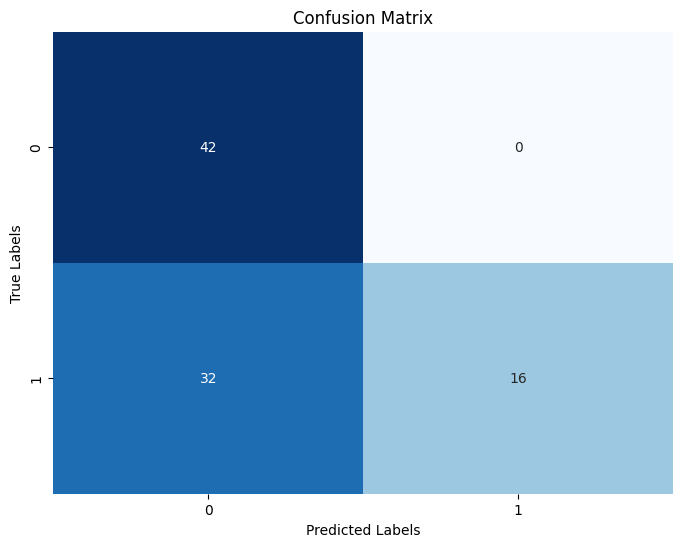

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


TEXT 6: In layman's terms, explain the significance of each cell of the Confusion Matrix.  HINT: Your explanation should detail the results within the context of 'true' and 'predicted' axes and labels.

In [30]:
# Generate and store the classification report for the fold
classification = classification_report(y_test, y_test_pred)
classification_reports.append(classification)

# Print the classification report for the current fold
print(f"Classification Report - Fold {len(classification_reports)}:\n{classification}")


Classification Report - Fold 12:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        42
           1       1.00      0.33      0.50        48

    accuracy                           0.64        90
   macro avg       0.78      0.67      0.61        90
weighted avg       0.80      0.64      0.60        90



<h2><b>HyperParameterTune the NaiveBayesClassifier</b></h2>

<h2>Using Stratified Kfold</h2>

AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
Average Training Accuracy: 69.70%
Average Testing Accuracy: 69.00%
Average Accuracy Difference: 0.70%


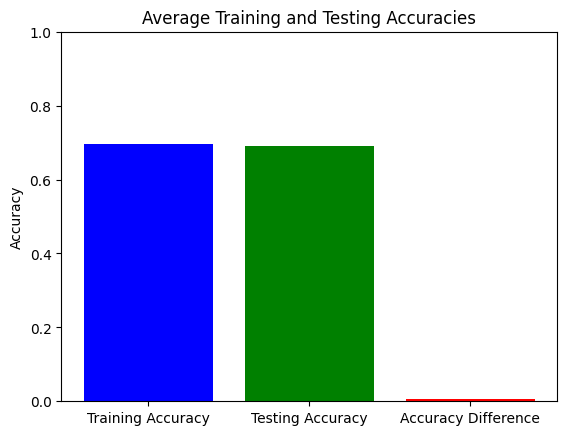

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k) and use StratifiedKFold
num_folds = 5
stratified_kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []

# Loop through each fold
for train_index, test_index in stratified_kf.split(X, y):  # Notice the addition of 'y'
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
# Calculate the average accuracy difference using average accuracies
average_accuracy_difference = average_train_accuracy - average_test_accuracy  # Use average accuracies
# Print the results
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("="*149)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Accuracy Difference: {average_accuracy_difference * 100:.2f}%")
print("="*149)

import matplotlib.pyplot as plt

# Create a bar plot
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()


# **Predictions**

In [33]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def predict_sentiment(sample_review, ada_boost_classifier, cv):
    # Preprocess the sample review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    # Transform the preprocessed review using the CountVectorizer (cv)
    temp = cv.transform([final_review]).toarray()

    # Use the pre-trained classifier to predict sentiment
    sentiment = ada_boost_classifier.predict(temp)

    return sentiment[0]  # Return the predicted sentiment (assuming it's a single value)


In [34]:
# Sample reviews as strings
reviews = [
    'The food is really bad.',
    'I love their delicious dishes!',
    'Terrible experience. Avoid this place.',
    'The service was excellent.',
    'Worst place ever, but nice food'
]

for review in reviews:
    sentiment = predict_sentiment(review, ada_boost_classifier, cv)
    if sentiment:
        sentiment_label = 'POSITIVE'
    else:
        sentiment_label = 'NEGATIVE'

    print(f"Review: '{review}'")
    print(f"Sentiment: {sentiment_label}")
    print()


Review: 'The food is really bad.'
Sentiment: NEGATIVE

Review: 'I love their delicious dishes!'
Sentiment: POSITIVE

Review: 'Terrible experience. Avoid this place.'
Sentiment: NEGATIVE

Review: 'The service was excellent.'
Sentiment: NEGATIVE

Review: 'Worst place ever, but nice food'
Sentiment: NEGATIVE



# Overall Accuracy

AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
Average Training Accuracy: 69.70%
Average Testing Accuracy: 69.00%
Average Accuracy Difference: 0.70%


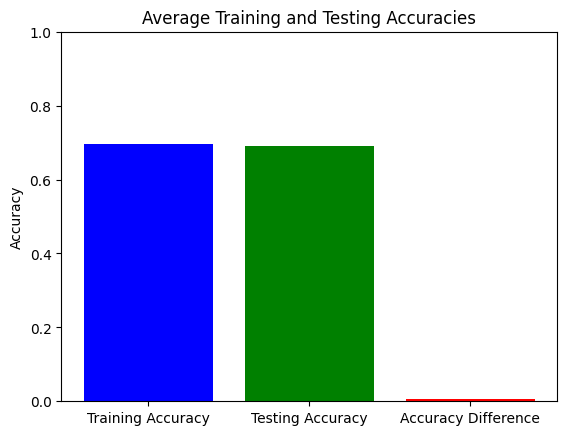

In [35]:
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("="*149)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Accuracy Difference: {average_accuracy_difference * 100:.2f}%")
print("="*149)



# Create a bar plot
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()

#Sentiment Analysis with VADER (Valence Aware Dictionary and sEntiment Reasoner)

**VADER** is a pre-built sentiment analysis tool commonly used (NLP). It is designed to analyze text data and determine the sentiment polarity of the text, i.e., whether the text expresses positive, negative, or neutral sentiment.

**VADER** is particularly useful for sentiment analysis of social media text, short texts, and informal language, as it is specifically tuned for such contexts.

**Compound Score :** VADER provides a compound score that represents the overall sentiment of the text, taking into account both positive and negative language. The compound score can help in quantifying sentiment intensity.

For more information on VADER:

*   https://www.codeproject.com/Articles/5269445/Using-Pre-trained-VADER-Models-for-NLTK-Sentiment
*   https://www.codeproject.com/Articles/5269447/Pros-and-Cons-of-NLTK-Sentiment-Analysis-with-VADE





In [36]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer


vader = SentimentIntensityAnalyzer()

def sent_analysis(corpus):
    '''
    input : The text
    output : The sentiment of the text
    '''
    sentiment = vader.polarity_scores(corpus)
    compound_score = sentiment['compound']

    if compound_score > 0 :
        return 1
    else:
        return 0


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [37]:
df['vader_sent'] = df['Review'].apply(lambda x : sent_analysis(x))


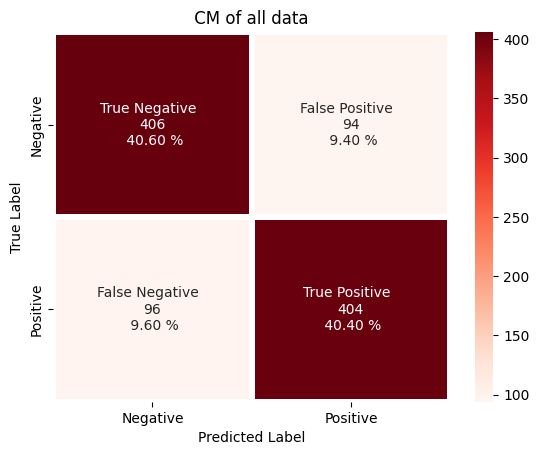

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_names = ['True Negative' ,'False Positive','False Negative' ,'True Positive']
cm=confusion_matrix(df['Liked'],df['vader_sent'])
value_count = [ value  for value in cm.flatten()]
presentage = [value for value in  cm.flatten()/ np.sum(cm)  ]
all_labels = [f'{v1}  \n{v2}\n {v3*100:.2f} %' for v1 ,v2 ,v3 in zip(cm_names ,value_count,presentage )]
all_labels = np.asarray(all_labels).reshape(2,2)
sns.heatmap(cm,annot=all_labels,cmap='Reds',
                linewidth=3,fmt='',
                xticklabels=['Negative','Positive'],
                yticklabels=['Negative','Positive']
               )


plt.title(' CM of all data ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

TEXT 7: a) Offer any final comments on the Predictions, Overall Accuracy and CM of the final models. b) What was the purpose of introducing 'sample reviews as strings'?  Were the results as you expected?  c) Any observations regarding the VADER model?